<a href="https://colab.research.google.com/github/armanalam6342/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


In [212]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

##<b> Import Modules

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
#to display all the graph in the workbook 
sns.set_style("whitegrid",{'grid.linestyle': '--'})

## <b> Loading the dataset

In [214]:
data= pd.read_csv("/content/drive/MyDrive/Bike Sharing Demand Prediction/SeoulBikeData.csv", encoding = "ISO-8859-1")

In [215]:
# Copy the data for backup
df = data.copy()

In [216]:
# Getting feel of the data
df.head()

Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes
3  01/12/2017                107     3  ...   Winter  No Holiday              Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday              Yes

[5 rows x 14 columns]

In [217]:
# Data shape
df.shape

(8760, 14)

In [218]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [219]:
# Statistical info 
df.describe(include='all').transpose()

count unique         top  ...    50%      75%   max
Date                       8760    365  03/11/2018  ...    NaN      NaN   NaN
Rented Bike Count          8760    NaN         NaN  ...  504.5  1065.25  3556
Hour                       8760    NaN         NaN  ...   11.5    17.25    23
Temperature(°C)            8760    NaN         NaN  ...   13.7     22.5  39.4
Humidity(%)                8760    NaN         NaN  ...     57       74    98
Wind speed (m/s)           8760    NaN         NaN  ...    1.5      2.3   7.4
Visibility (10m)           8760    NaN         NaN  ...   1698     2000  2000
Dew point temperature(°C)  8760    NaN         NaN  ...    5.1     14.8  27.2
Solar Radiation (MJ/m2)    8760    NaN         NaN  ...   0.01     0.93  3.52
Rainfall(mm)               8760    NaN         NaN  ...      0        0    35
Snowfall (cm)              8760    NaN         NaN  ...      0        0   8.8
Seasons                    8760      4      Spring  ...    NaN      NaN   NaN
Holiday                    8760      2  No Holiday  ...    NaN      NaN   NaN
Functioning Day            8760      2         Yes  ...    NaN      NaN   NaN

[14 rows x 11 columns]

##<b> Preprocessing the data

In [220]:
# Checking null values of data 
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [221]:
# Checking duplicate
df.duplicated().sum()

0

In [222]:
# converting date column dtype object to date 
df['Date']=pd.to_datetime(df['Date'])

In [223]:
# split day of week, month and year in three column
df['day_of_week'] = df['Date'].dt.day_name() # extract week name from Date column
df["month"] = df['Date'].dt.month_name()   # extract month name from Date column
df["year"] = df['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 

In [224]:
# drop the Date column
df.drop(columns=['Date'],inplace=True)

#<b> Exploratory data analysis 

##<b> When we observe the data we realize that Hour column is a numerical column but it is a time stamp so we have to treat Hour as a categorical feature

In [225]:
# convert Hour column integer to Categorical 
df['Hour']=df['Hour'].astype('object')

In [226]:
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [227]:
numeric_features.head()


Rented Bike Count  Temperature(°C)  ...  Rainfall(mm)  Snowfall (cm)
0                254             -5.2  ...           0.0            0.0
1                204             -5.5  ...           0.0            0.0
2                173             -6.0  ...           0.0            0.0
3                107             -6.2  ...           0.0            0.0
4                 78             -6.0  ...           0.0            0.0

[5 rows x 9 columns]

In [228]:
categorical_features.head()

Hour Seasons     Holiday Functioning Day day_of_week    month  year
0    0  Winter  No Holiday             Yes    Thursday  January  2017
1    1  Winter  No Holiday             Yes    Thursday  January  2017
2    2  Winter  No Holiday             Yes    Thursday  January  2017
3    3  Winter  No Holiday             Yes    Thursday  January  2017
4    4  Winter  No Holiday             Yes    Thursday  January  2017

In [229]:
# checking categorical column value count
for i in categorical_features.columns:
  print("\n ")
  print('column name  : ', i)
  print(df[i].value_counts())


 
column name  :  Hour
23    365
22    365
1     365
2     365
3     365
4     365
5     365
6     365
7     365
8     365
9     365
10    365
11    365
12    365
13    365
14    365
15    365
16    365
17    365
18    365
19    365
20    365
21    365
0     365
Name: Hour, dtype: int64

 
column name  :  Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

 
column name  :  Holiday
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

 
column name  :  Functioning Day
Yes    8465
No      295
Name: Functioning Day, dtype: int64

 
column name  :  day_of_week
Sunday       1296
Wednesday    1272
Tuesday      1272
Saturday     1248
Thursday     1248
Friday       1224
Monday       1200
Name: day_of_week, dtype: int64

 
column name  :  month
May          744
July         744
October      744
January      744
December     744
March        744
August       744
September    720
November     720
June         720
April        720
Februar

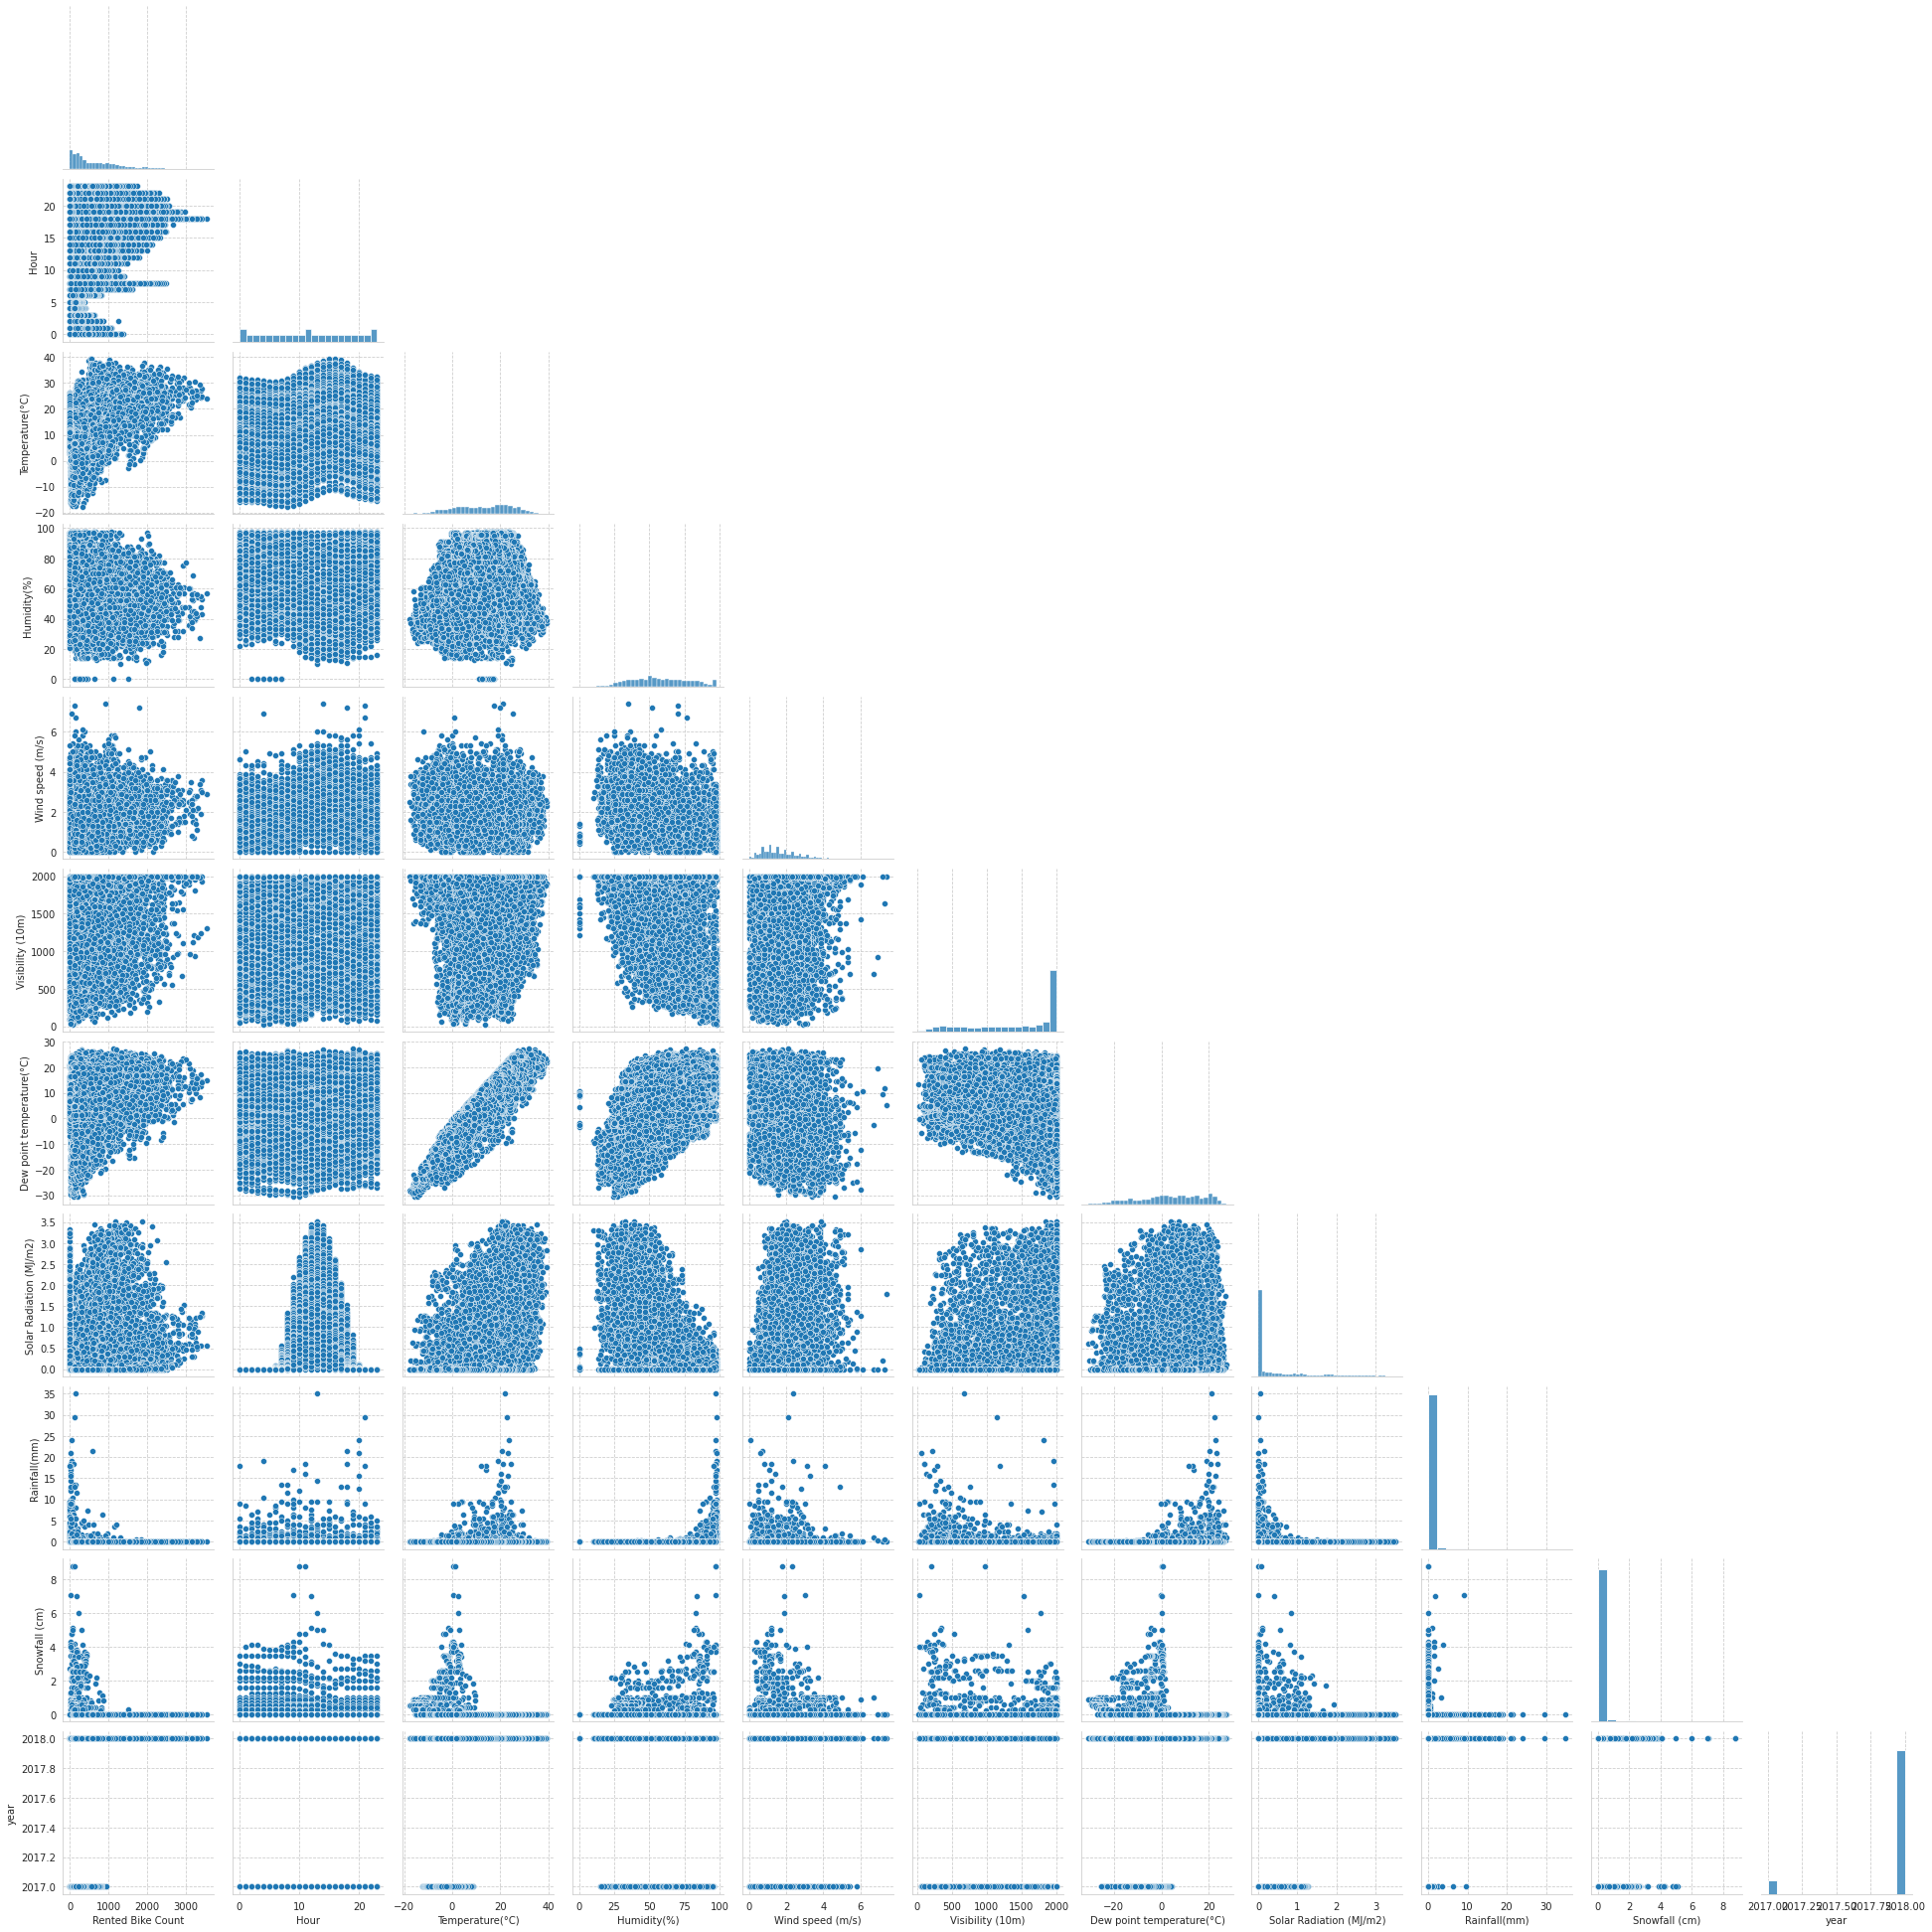

In [183]:
#ploting pairplot for more info
sns.pairplot(df, corner=True)

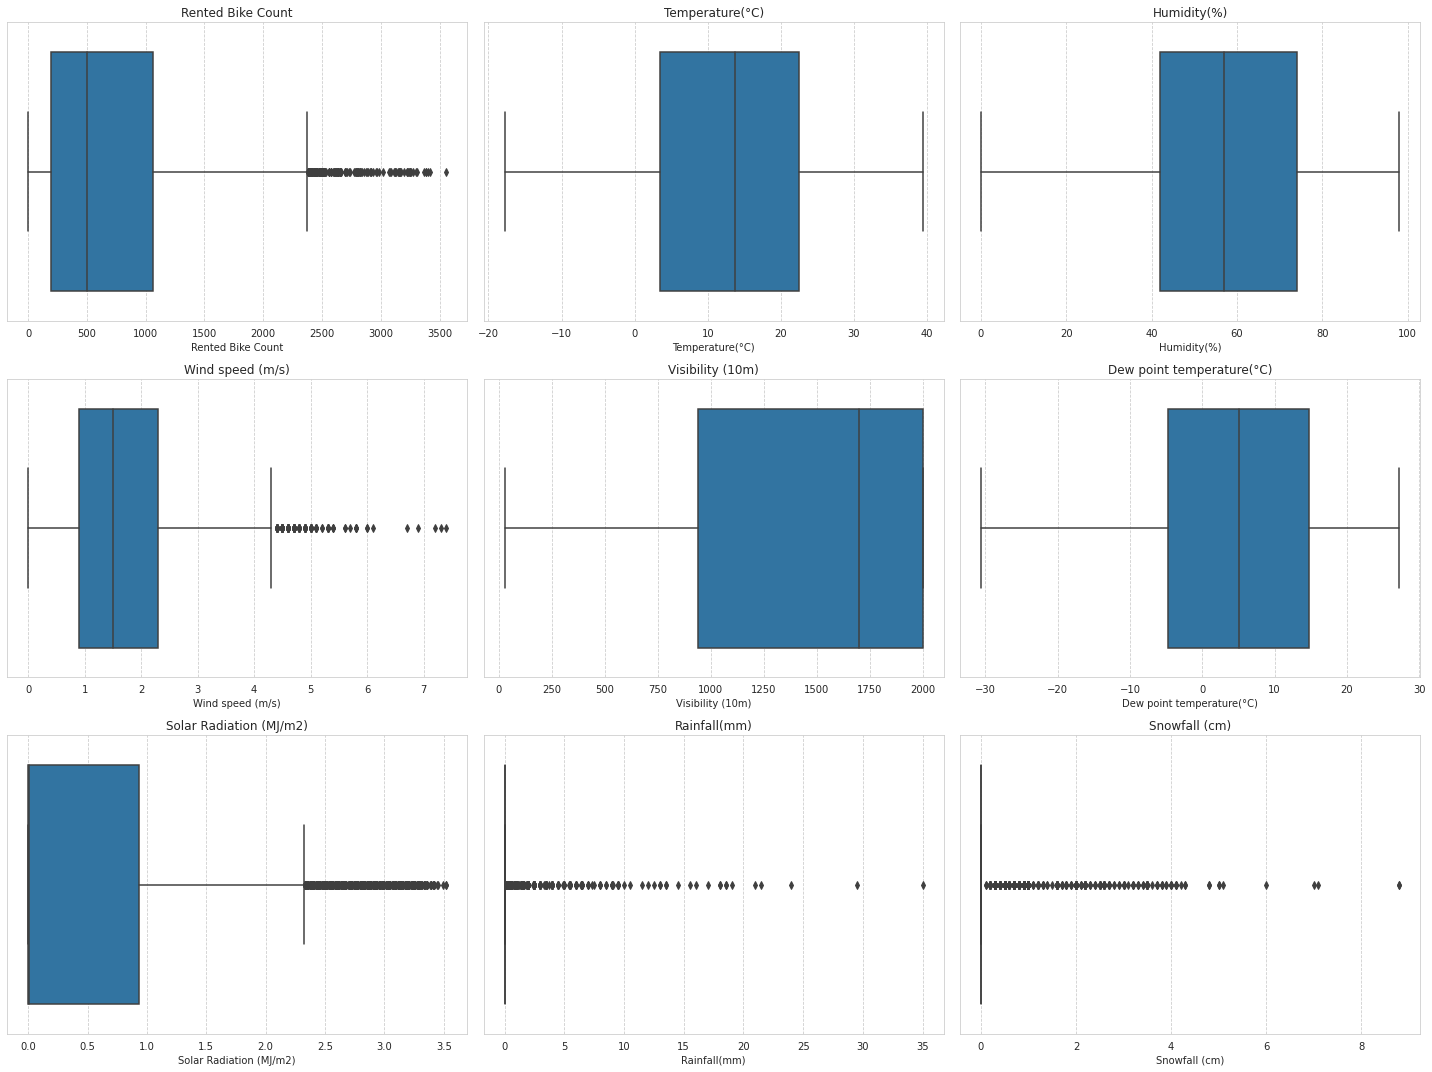

In [184]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

We don't think of worry about outliers in this data 

##<b> Explore our categorical feature and Trying to take some important information from the categorical feature

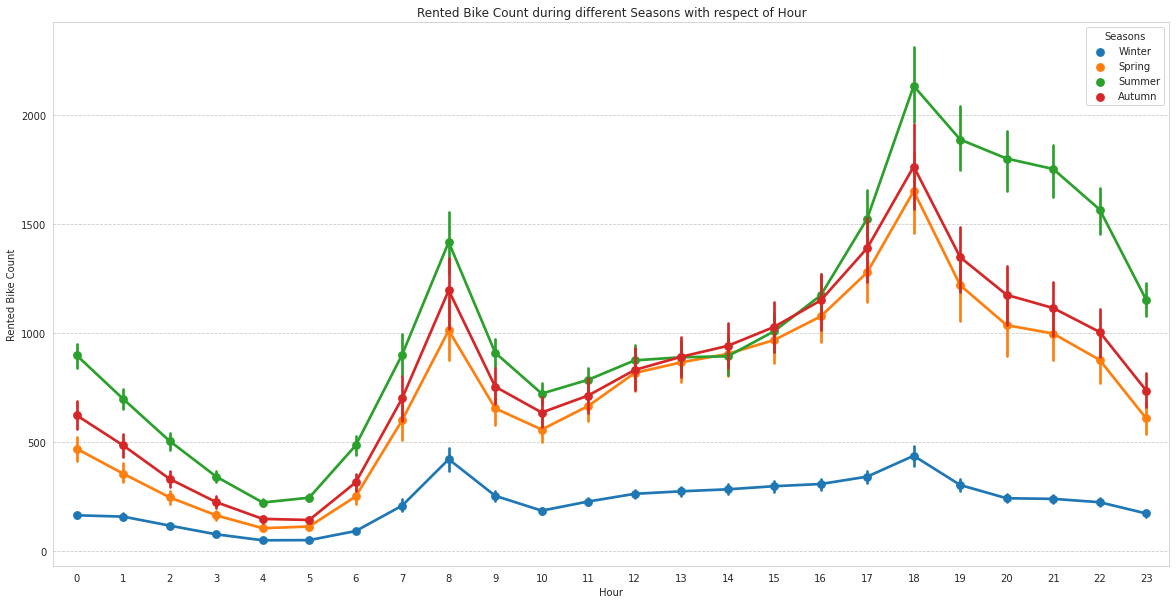

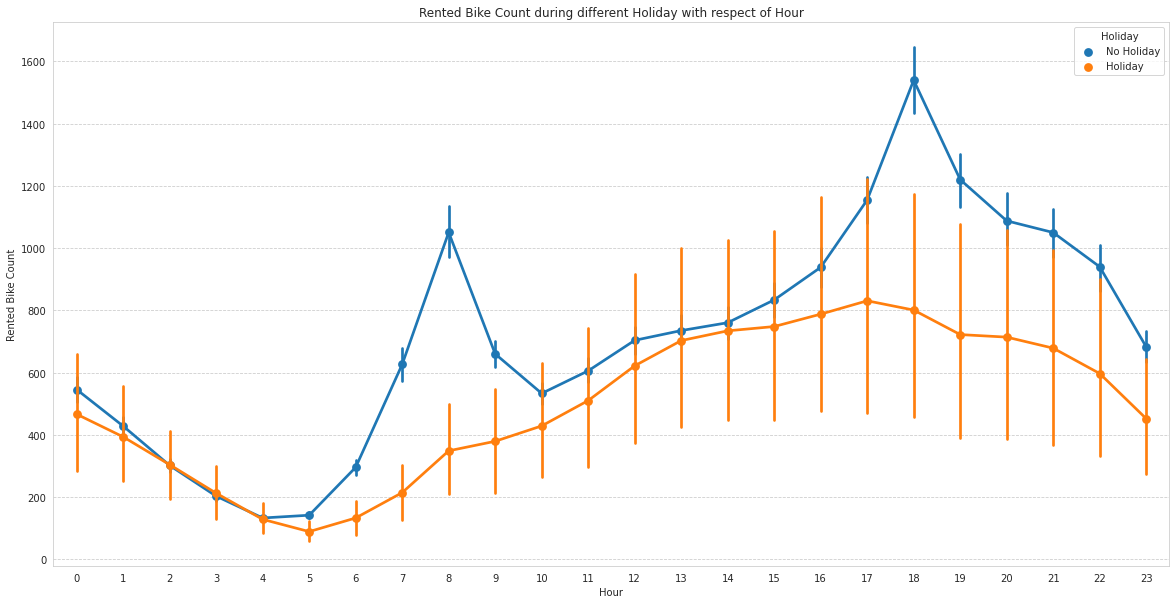

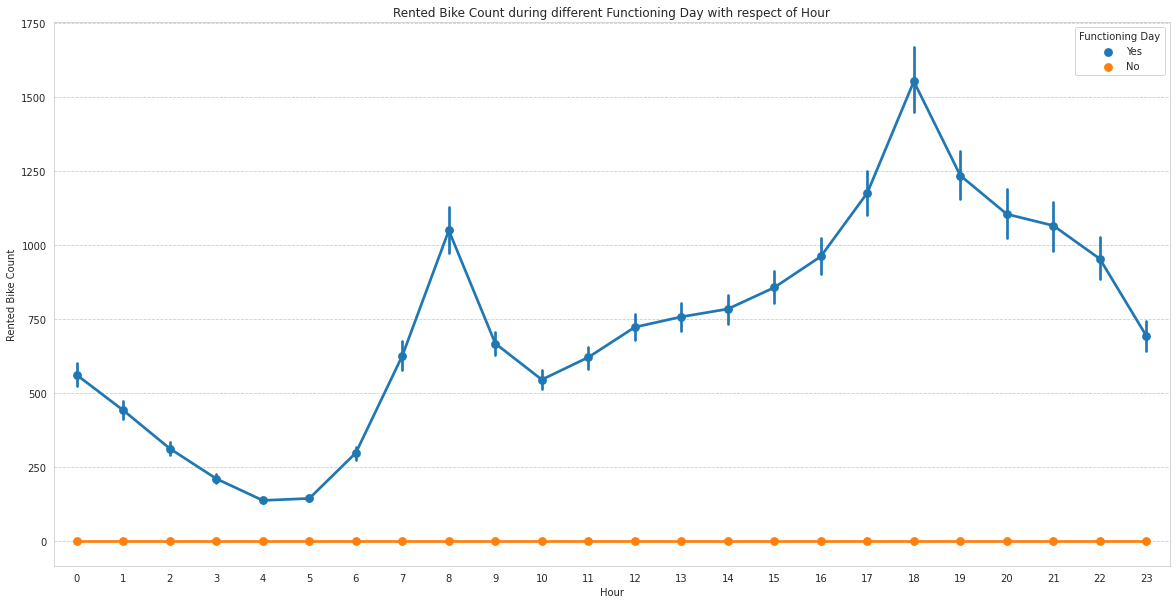

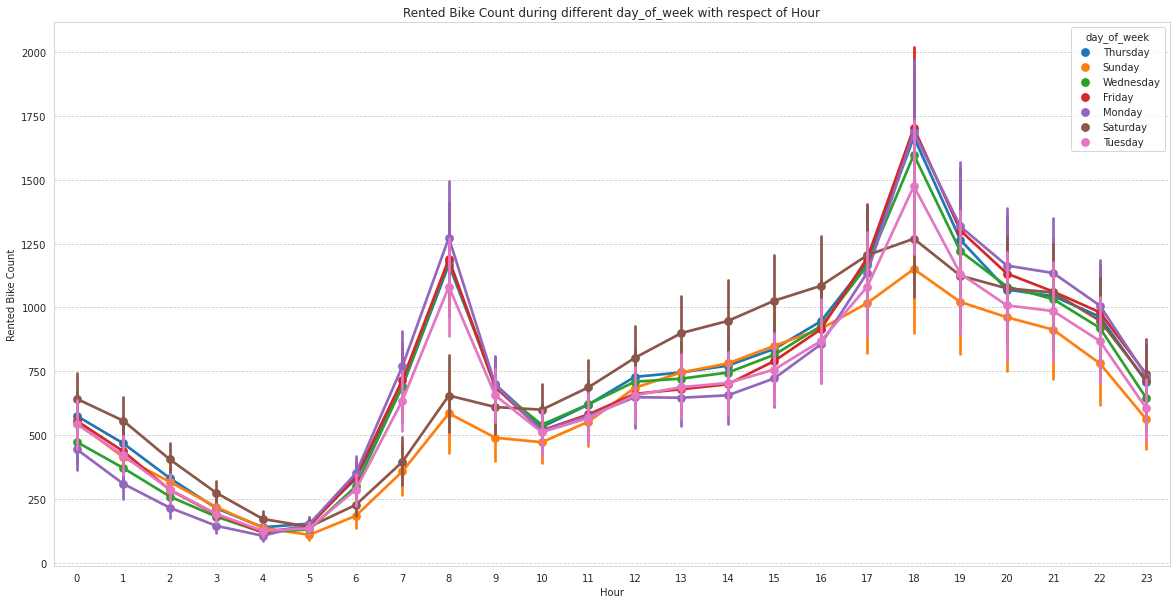

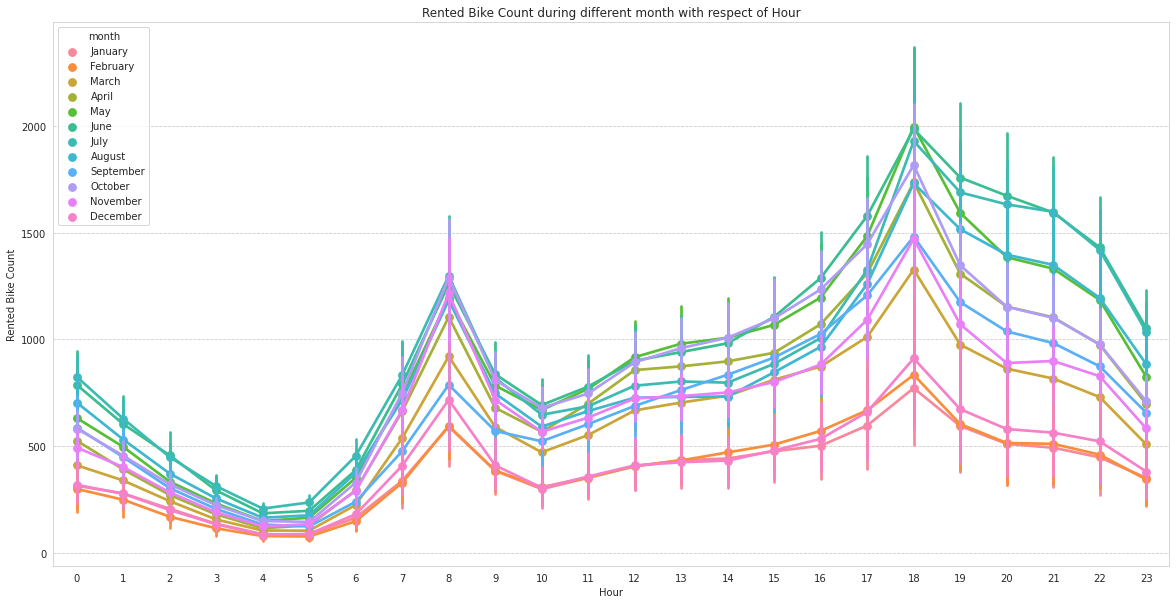

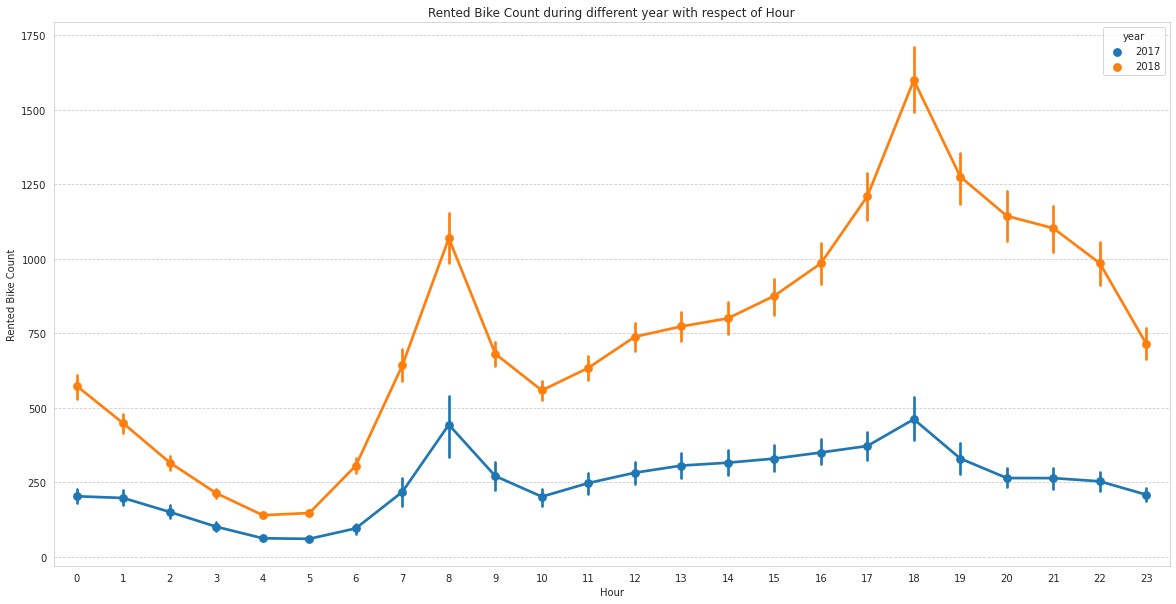

In [185]:
# we create point plots with Rented Bike Count during different categorical features with respect of Hour
for i in categorical_features.columns:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(20,10))
    sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

##<b> Observation 
From all these pointplot we have observed a lot from every column like :

## Season 
In the season column, we are able to understand that the demand is low in the winter season.

## Holiday
In the Holiday column, The demand is low during holidays, but in no holidays the demand is high, it may be because people use bikes to go to their work.

## Functioning Day
In the Functioning Day column, If there is no Functioning Day then there is no demand

## Days of week
In the Days of week column, We can observe from this column that the pattern of weekdays and weekends is different, in the weekend the demand becomes high in the afternoon. While the demand for office timings is high during weekdays, **we can further change this column to weekdays and weekends.**

## month 
In the month column, We can clearly see that the demand is low in December January & Febuary, It is cold in these months and we have already seen in season column that demand is less in winters.

## year
The demand was less in 2017 and higher in 2018, it may be because it was new in 2017 and people did not know much about it.

#<b> Some more experiments for our categorical features 

In [186]:
# Converting days of weeks in Two variable from Monaday to Friday in Weekdays and Saturday and Sunday to Weekend
df['week'] = df['day_of_week'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [187]:
# value counts of Week column
df.week.value_counts()

Weekdays    6216
Weekend     2544
Name: week, dtype: int64

Text(0.5, 1.0, 'Rented Bike Count during weekday and weekend with respect of Hour')

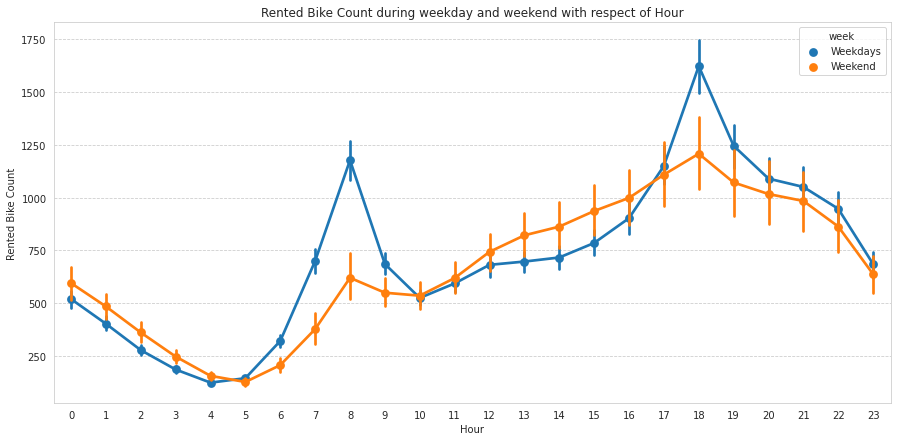

In [188]:
# Getting feel of week column with pointplot  
plt.figure(figsize=(15,7))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df['week'])
plt.title("Rented Bike Count during weekday and weekend with respect of Hour")

## Now we can clearly see the pattern which shows that the demand is high in the afternoon on the weekend. While there is more demand during office hours in weekdays

## Now we can drop the days of week column

In [189]:
# droping the days of week column from df and from categorical feature 
df.drop(columns=['day_of_week'], inplace=True)
categorical_features.drop(columns=['day_of_week'], inplace=True)

## Lets do some feature engineering on Hour column

In [190]:
# defining a function for distribute hour column
def hour(h):
  if h >= 17 and h <= 22:
    return 'Evening'
  elif h >= 7 and h <= 10:
    return 'Morning'
  elif h >= 11 and h <= 16:
    return 'Noon'
  else :
    return 'Night'     

In [191]:
# apply the hour function
df['Hour'] = df['Hour'].apply(hour)

In [192]:
# value count of Hour 
df['Hour'].value_counts()

Night      2920
Noon       2190
Evening    2190
Morning    1460
Name: Hour, dtype: int64

##<b> value Counts in percentage 

In [193]:
for i in categorical_features.columns:
  print('feature name : ',i)
  print(df[i].value_counts(normalize=True))
  print('\n')

feature name :  Hour
Night      0.333333
Noon       0.250000
Evening    0.250000
Morning    0.166667
Name: Hour, dtype: float64


feature name :  Seasons
Spring    0.252055
Summer    0.252055
Autumn    0.249315
Winter    0.246575
Name: Seasons, dtype: float64


feature name :  Holiday
No Holiday    0.950685
Holiday       0.049315
Name: Holiday, dtype: float64


feature name :  Functioning Day
Yes    0.966324
No     0.033676
Name: Functioning Day, dtype: float64


feature name :  month
May          0.084932
July         0.084932
October      0.084932
January      0.084932
December     0.084932
March        0.084932
August       0.084932
September    0.082192
November     0.082192
June         0.082192
April        0.082192
February     0.076712
Name: month, dtype: float64


feature name :  year
2018    0.915068
2017    0.084932
Name: year, dtype: float64




##<b> lets take a visualization of value counts 



====================================================================== Hour ======================================================================




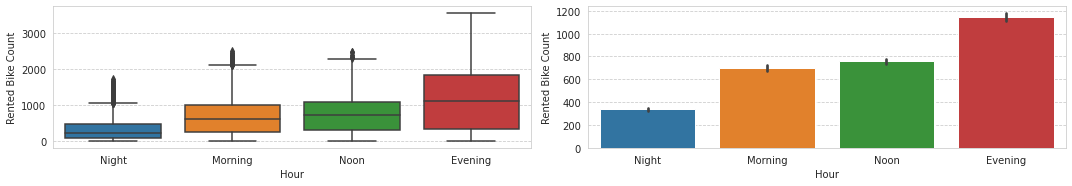



====================================================================== Seasons ======================================================================




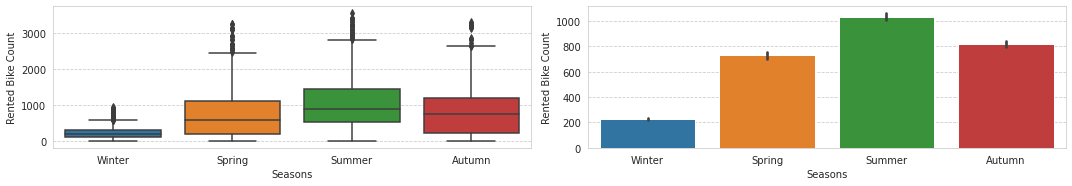



====================================================================== Holiday ======================================================================




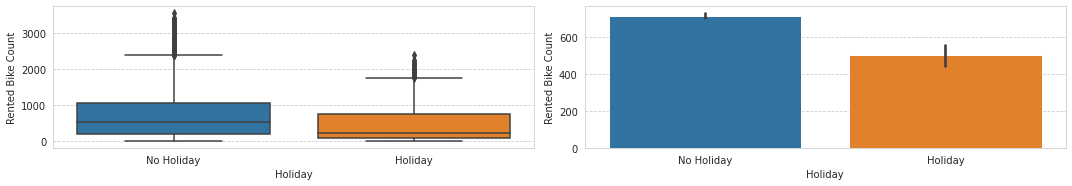



====================================================================== Functioning Day ======================================================================




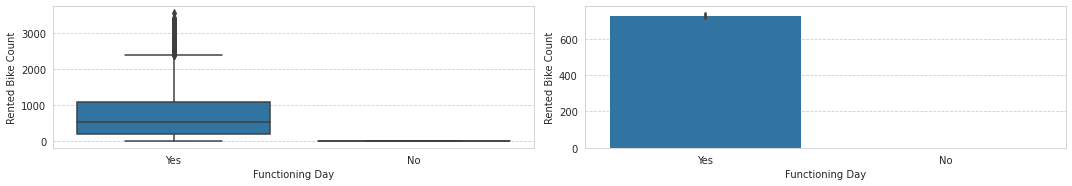



====================================================================== month ======================================================================




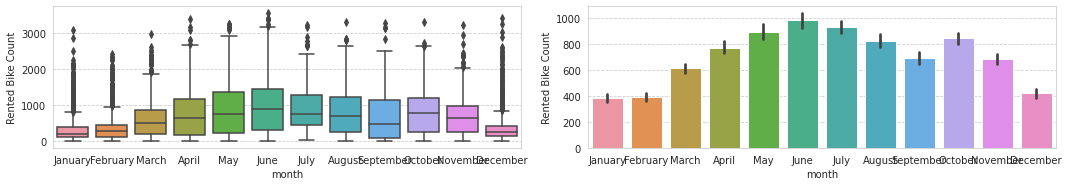



====================================================================== year ======================================================================




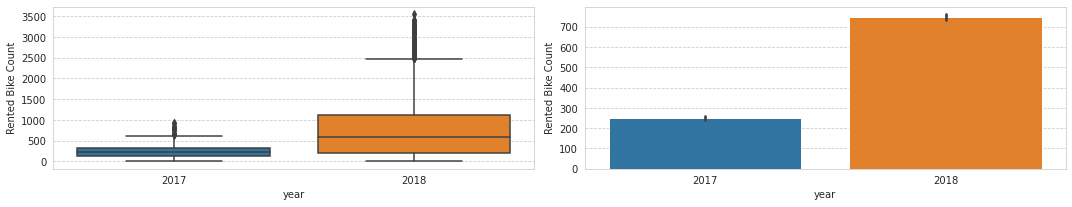

In [194]:
# creating boxplot plot and bar plot
n=1
for i in categorical_features.columns:
  plt.figure(figsize=(15,15))
  plt.subplot(6,2,n)
  n+=1
  print('\n')
  print('='*70,i,'='*70)
  print('\n')
  sns.boxplot(x=df[i],y=df["Rented Bike Count"])
  plt.subplot(6,2,n)
  n+= 1
  sns.barplot(df[i],df['Rented Bike Count'])
  plt.tight_layout()
  plt.show()

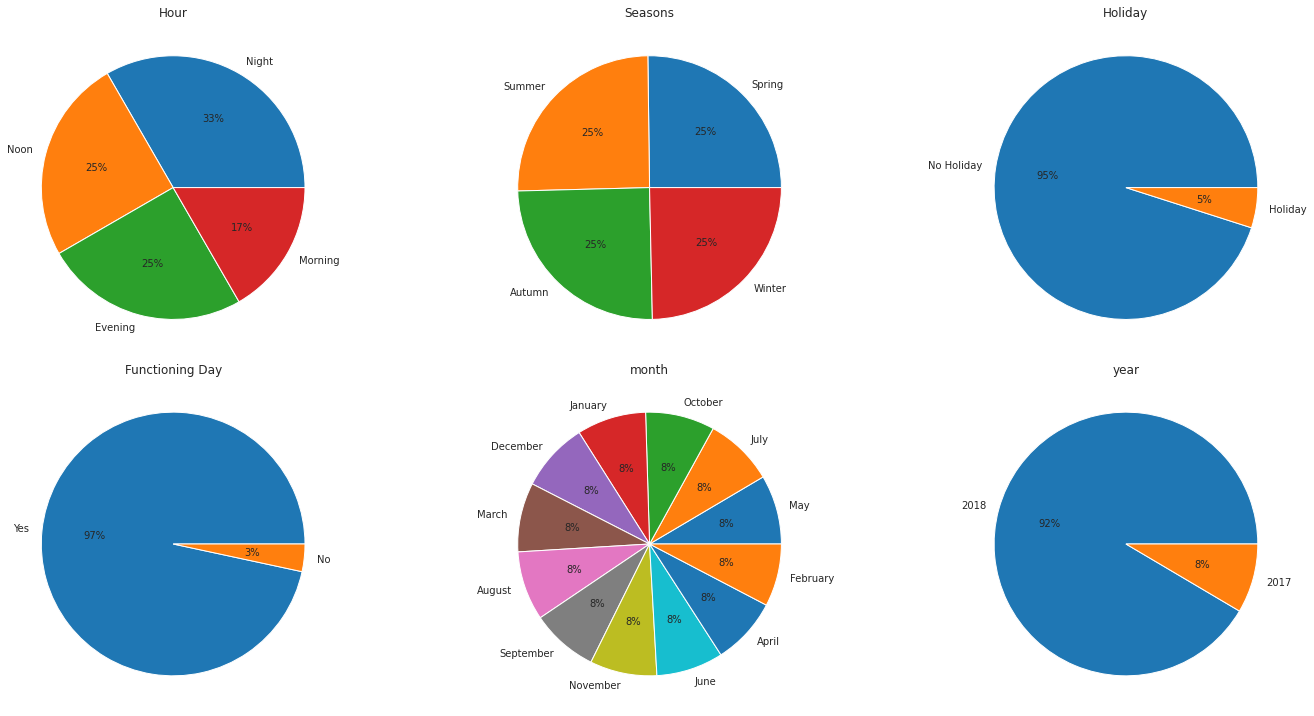

In [195]:
# creating pieplot for all categorical feature
n=1
plt.figure(figsize=(20,15))
for i in categorical_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  plt.pie(df[i].value_counts(),labels = df[i].value_counts().keys().tolist(),autopct='%.0f%%')
  plt.title(i)
  plt.tight_layout()

##<b> Now the time of Explore our numerical feature and Trying to take some important information from the Numeical feature

##<b> Pays little attention to the skewness of our numerical features

# In this plots we observe that some of our columns is right skewed and some are left skewed we have to remember this things when we apply algorithms

## Right skewed columns are
Rented Bike Count (Its also our Dependent variable), 
Wind speed (m/s),
Solar Radiation (MJ/m2),
Rainfall(mm),
Snowfall (cm),

## Left skewed columns are
Visibility (10m), 
Dew point temperature(°C)


##<b> Let's try something else to get information from our Numerical features



====================================================================== Rented Bike Count ======================================================================




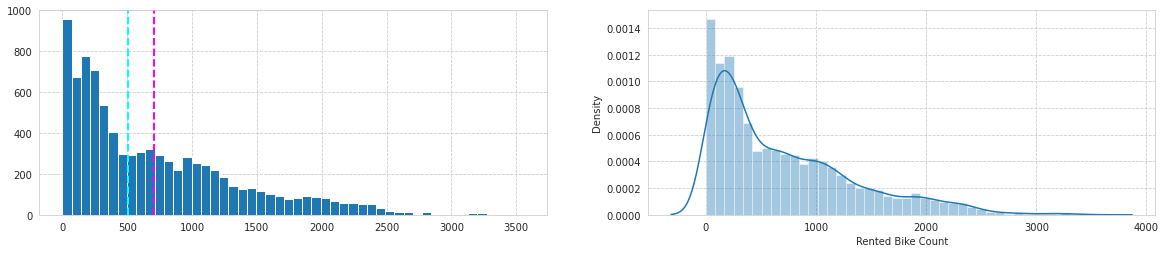



====================================================================== Temperature(°C) ======================================================================




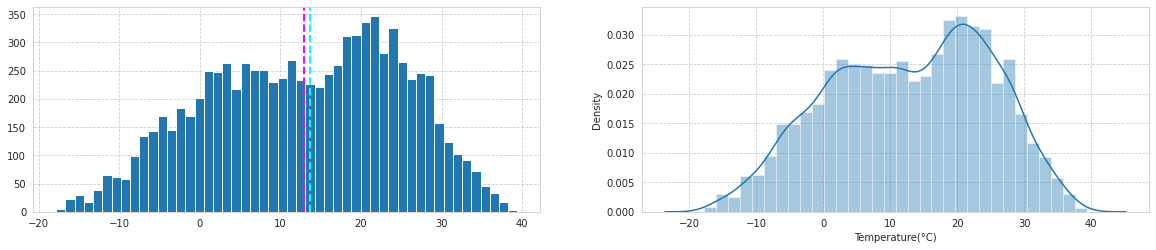



====================================================================== Humidity(%) ======================================================================




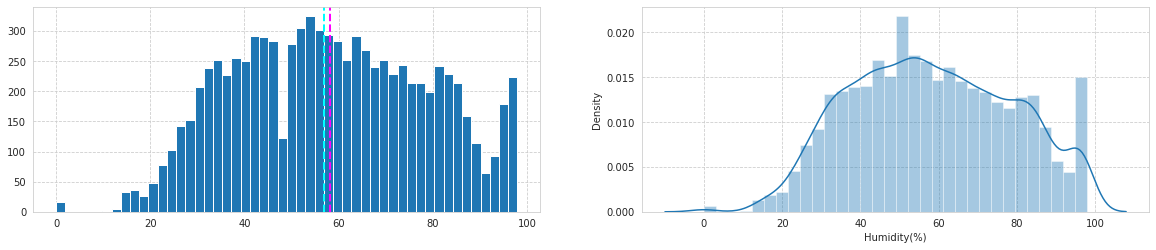



====================================================================== Wind speed (m/s) ======================================================================




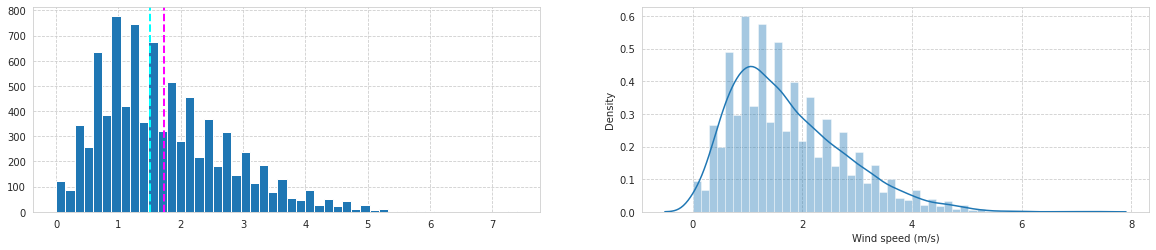



====================================================================== Visibility (10m) ======================================================================




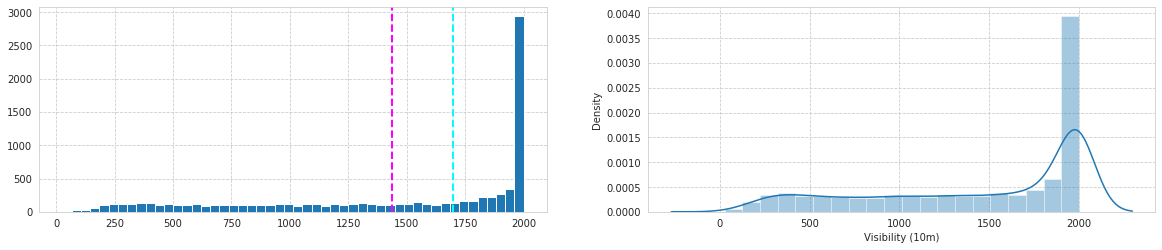



====================================================================== Dew point temperature(°C) ======================================================================




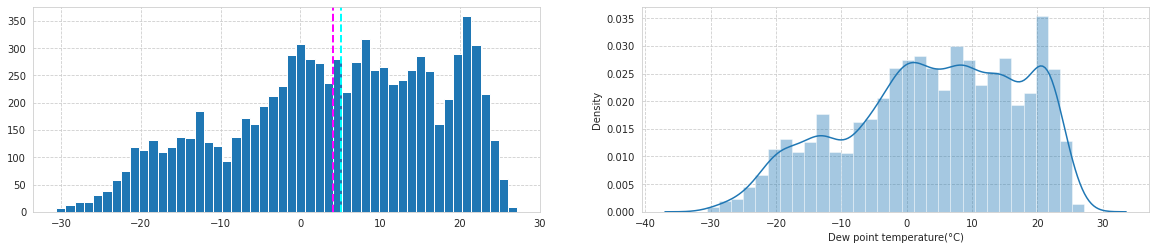



====================================================================== Solar Radiation (MJ/m2) ======================================================================




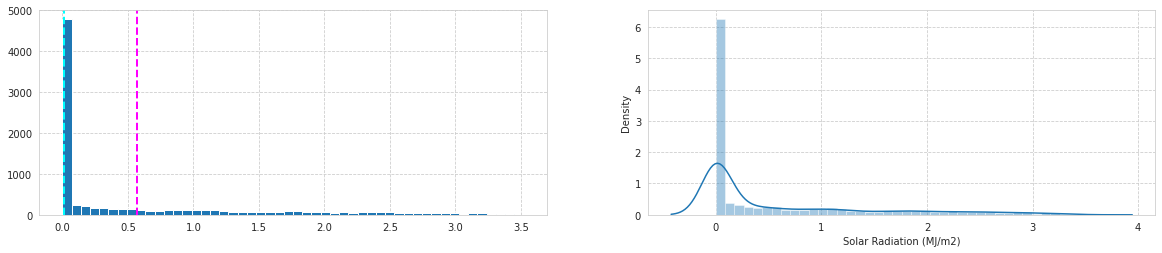



====================================================================== Rainfall(mm) ======================================================================




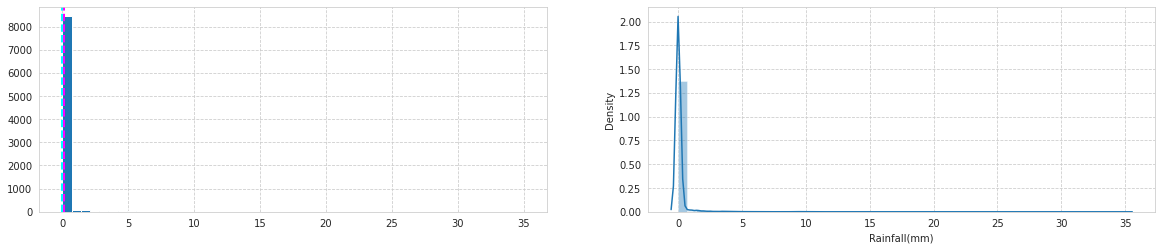



====================================================================== Snowfall (cm) ======================================================================




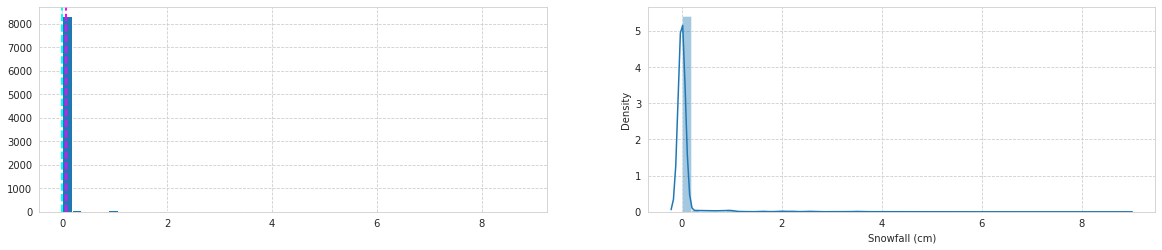

In [196]:
#plotting histogram with mean and median, and distplot of all the numeric features of the dataset
n=1
for i in numeric_features.columns:
  plt.figure(figsize=(20,40))
  plt.subplot(9,2,n)
  n+=1
  print('\n')
  print('='*70,i,'='*70)
  print('\n')
  # fig=plt.figure()
  # ax=fig.gca()
  feature=df[i]
  feature.hist(bins=50,)
  plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2) 
  plt.subplot(9,2,n)
  n+= 1
  sns.distplot(df[i])
  # plt.tight_layout()
  plt.show()


# In Distplot plots we observe that some of our columns is right skewed and some are left skewed we have to remember this things when we apply algorithms

## Right skewed columns are
Rented Bike Count (Its also our Dependent variable), 
Wind speed (m/s),
Solar Radiation (MJ/m2),
Rainfall(mm),
Snowfall (cm),

## Left skewed columns are
Visibility (10m), 
Dew point temperature(°C)

## From Histogram we are coming to know that the features which are skewed, their mean and the median are also skewed, which was understood by looking at the graph that this would happen.

##<b> Lets try to find how is the relation of numerical features with our dependent variable

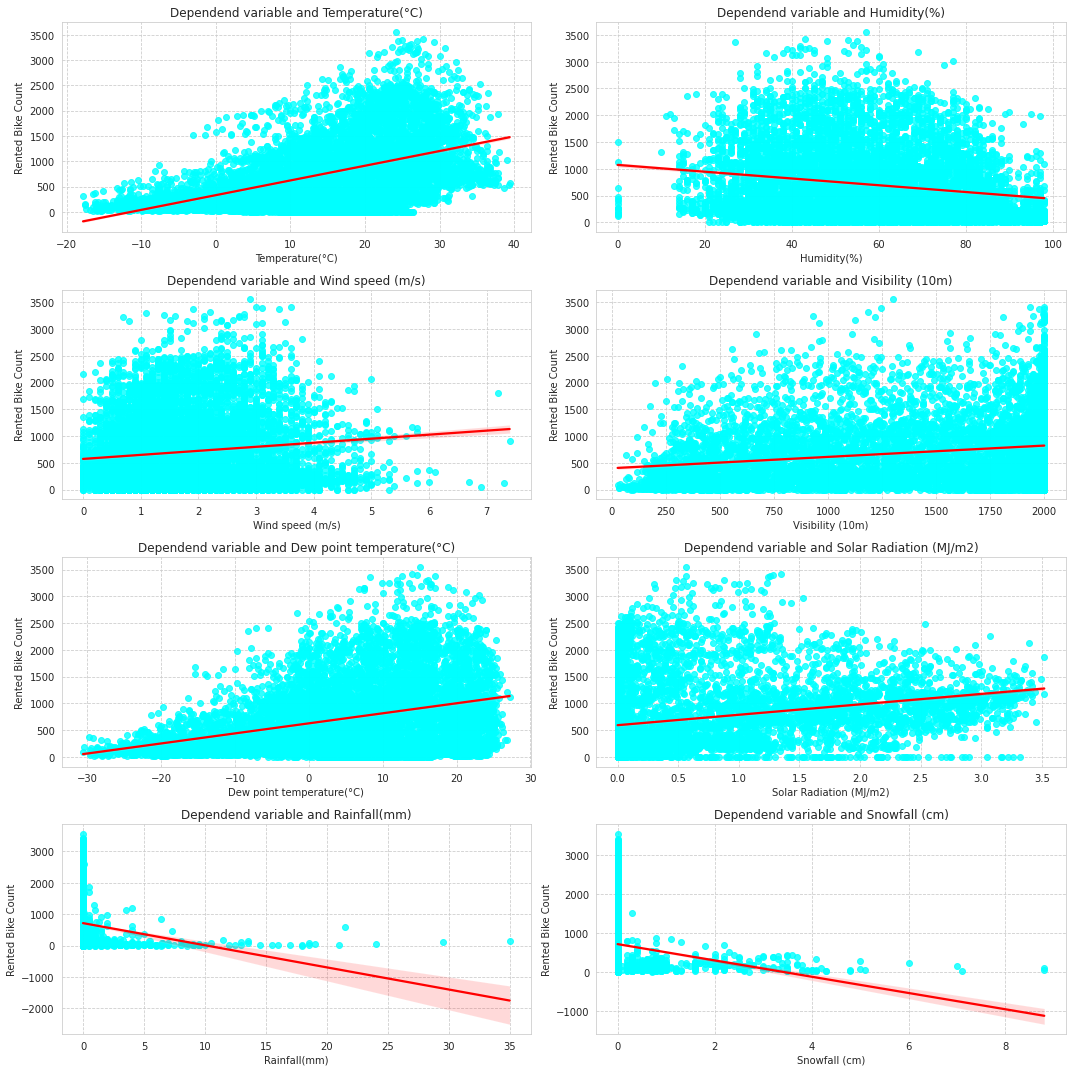

In [197]:
# Regression plot to know relation with our independent variable
n=1
plt.figure(figsize=(15,15))
for i in numeric_features.columns:
  if i == 'Rented Bike Count':
    pass
  else:
    plt.subplot(4,2,n)
    n+=1
    sns.regplot(df[i], df['Rented Bike Count'],scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
    plt.title(f'Dependend variable and {i}')
    plt.tight_layout()

## This regression plots shows that some of our features are positive linear and some are negative linear in relation to our target variable.

## <b> Now is the time to know what is the correlation of our dependent variable with the independent features

In [198]:
# Correlation with Rented Bike Count
df.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Name: Rented Bike Count, dtype: float64

## As we saw in the regression plot that some features are negatively correlated and some positive, we are seeing the same thing here as well.

##<b> Let us see the correlation of all the numerical features with the heat map, so that we will also get to know the multilinearity.

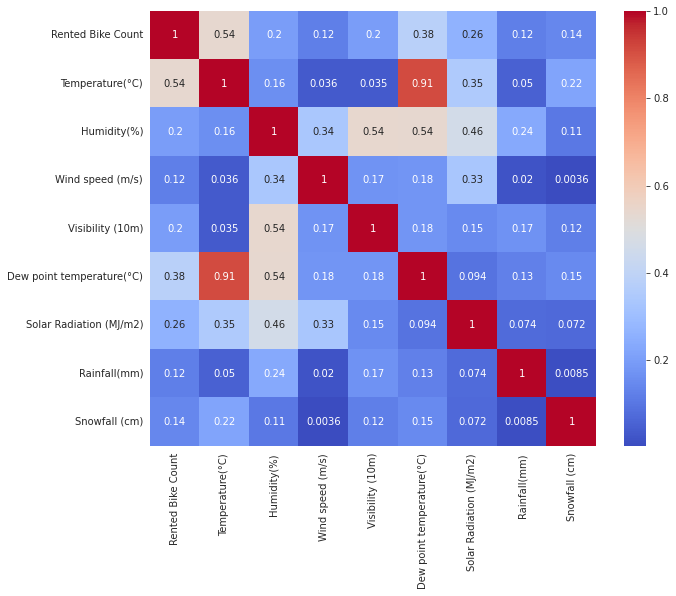

In [199]:
# using seaborn heatmap for ploting correlation graph 
plt.figure(figsize=(10,8))
sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True)

## From this graph we are able to see that there is multicollinearity in temperature(°C) and dev point temperature(°C) column.

In [200]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [201]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables       VIF
0          Temperature(°C)  3.166007
1              Humidity(%)  4.758651
2         Wind speed (m/s)  4.079926
3         Visibility (10m)  4.409448
4  Solar Radiation (MJ/m2)  2.246238
5             Rainfall(mm)  1.078501
6            Snowfall (cm)  1.118901

In [202]:
new_df=pd.get_dummies(df,drop_first=True,sparse=True)

In [203]:
new_df.head(2)

Rented Bike Count  Temperature(°C)  ...  year_2018  week_Weekend
0                254             -5.2  ...          0             0
1                204             -5.5  ...          0             0

[2 rows x 30 columns]

##<b> We saw that our dependent variable is right skewed, it needs to be normalized.
##We do some experiments to normalize it

Text(0.5, 1.0, 'Square root')

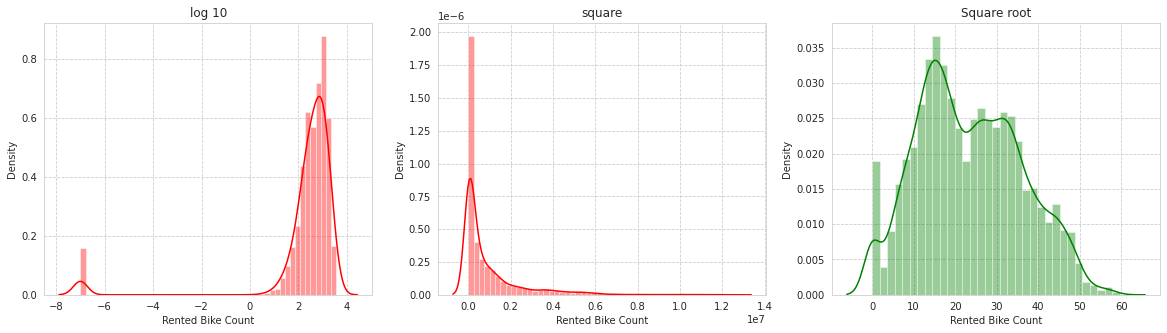

In [204]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
# here we use log10 
sns.distplot(np.log10(new_df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
# here we use square 
sns.distplot((new_df['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")
# here we use square root 
sns.distplot(np.sqrt(new_df['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")

## Our data in green plot is normalized to some extent: so we will go with square root on our dependent variable

## Divide data in dependent feature and Independent feature

In [205]:
X = new_df.drop(columns=['Rented Bike Count','Dew point temperature(°C)'])
y = np.sqrt(new_df['Rented Bike Count'])

In [206]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

## Geeting Feel of my X_train, X_test, y_train, y_test

In [207]:
X_train.head()

Temperature(°C)  Humidity(%)  ...  year_2018  week_Weekend
2223             16.0           14  ...          1             1
798              -6.7           48  ...          1             0
7752             11.3           71  ...          1             1
734               3.0           28  ...          0             1
2881             11.5           77  ...          1             1

[5 rows x 28 columns]

In [208]:
X_test.head()

Temperature(°C)  Humidity(%)  ...  year_2018  week_Weekend
6056             27.2           69  ...          1             0
5556             32.6           51  ...          1             0
5990             34.0           50  ...          1             1
7674             16.9           47  ...          1             0
3319              6.4           51  ...          1             0

[5 rows x 28 columns]

In [209]:
y_train.head()

2223    35.185224
798     11.704700
7752    29.849623
734     16.186414
2881    22.405357
Name: Rented Bike Count, dtype: float64

In [210]:
y_test.head()

6056    41.569219
5556    28.670542
5990    25.651511
7674    52.115257
3319    32.908965
Name: Rented Bike Count, dtype: float64

In [211]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6570, 28), (2190, 28), (6570,), (2190,))

##<b>Defining a function to train and evaluate the model with Diffrent parameters like MSE , RMSE, R2 Score, Best_params, Best score, Coefficient , intercept and feature importance  

In [230]:
# Appending all models parameters to the corrosponding list
mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model
    
  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  try:
      # finding the best parameters of the model if any 
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    pass
    

  #predicting the Test set and evaluting the models 

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')
  
  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

    #Top 10 feature importance graph
    try:
      best = model.best_estimator_
      features = new_X.columns
      importances = best.feature_importances_[0:10]
      indices = np.argsort(importances)
      plt.figure(figsize=(10,15))
      plt.title('Feature Importance')
      plt.barh(range(len(indices)), importances[indices], color='pink',edgecolor='red' ,align='center')
      plt.yticks(range(len(indices)), [features[i] for i in indices])
      plt.xlabel('Relative Importance')
      plt.show()
    
    except:
      pass
  
  # Here we appending the parameters for all models 
  mean_absolut_error.append(MAE)
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  training_score.append(training)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values  
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass



## transforming X_train and X_test with yeo-johnson transformation




In [231]:
from sklearn.preprocessing import PowerTransformer,MinMaxScaler
yeo = PowerTransformer()
X_train_trans = yeo.fit_transform(X_train) # fit transform the training set
X_test_trans = yeo.transform(X_test) #tranform the test set

#<b> Linear Regression

In [232]:
# imporing linear models
from sklearn.linear_model import LinearRegression,Lasso,Ridge

Training score  = 0.7378445847983587
MAE : 4.990976318820605
MSE : 40.958428359663095
RMSE : 6.399877214420844
R2 : 0.7293714211193334
Adjusted R2 :  0.7258648962657199 

********************************************************************************
coefficient 
 [ 5.65500454 -1.87153989  0.21489     0.33831855  0.81346561 -3.08847527
  0.07726284 -1.95086214 -5.19350913 -3.78098169 -1.16480122 -1.48388106
 -3.25975849  0.59625344  5.2898929  -0.28717568  0.07889965 -0.20063938
 -0.02456533 -0.23725407  1.04824513 -0.17447536  0.33718734  0.08618123
  0.39555192 -0.03544658 -0.50957997 -0.35291364]


Intercept  =  23.442819487037085


******************** ploting the graph of Actual and predicted only with 80 observation ********************


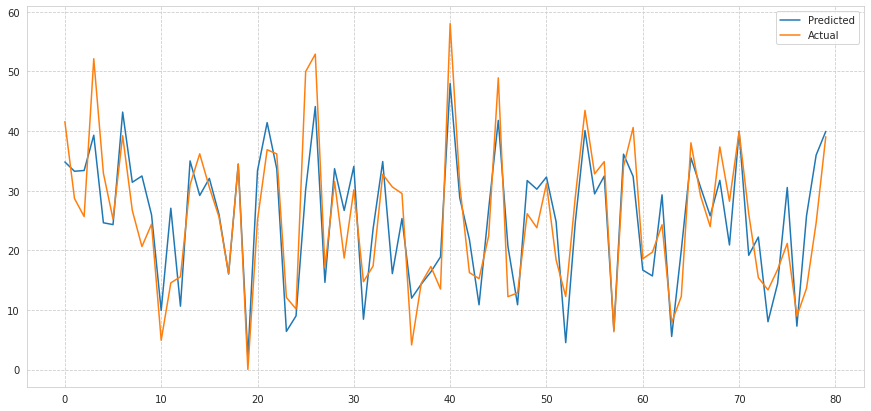

In [233]:
# importing Fitting the linear regression model with our score matrix function 
score_metrix(LinearRegression(),X_train_trans,X_test_trans,y_train,y_test)

##<b> Regularization

# Lasso with hyperparameter tuning

In [234]:
# importing Lasso from sklearn
from sklearn.linear_model import Lasso

In [235]:
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters 
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model


Training score  = 0.7378117832639521
The best parameters found out to be :{'alpha': 0.01} 
where model best score is:  0.7350053384412149 

MAE : 4.991069236599319
MSE : 40.93836620221497
RMSE : 6.398309636319188
R2 : 0.7295039797495568
Adjusted R2 :  0.7259991724533919 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


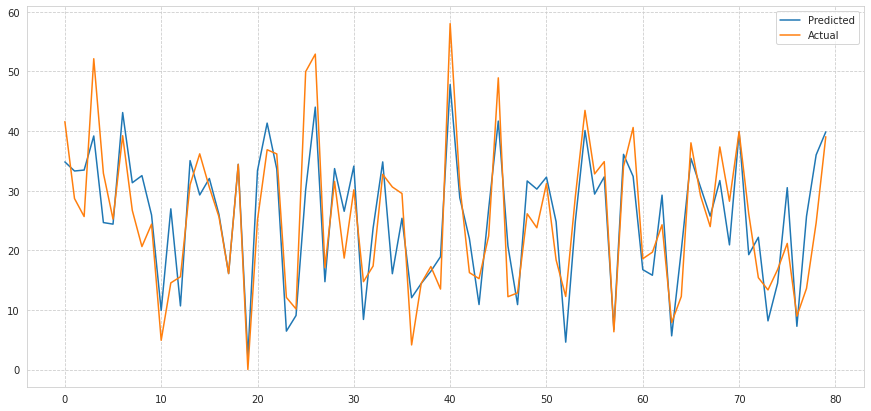

In [236]:
# fit and evaluate model with score_matrix function
score_metrix(lasso_cv,X_train_trans,X_test_trans,y_train,y_test)

## Ridge with hyperparameter tuning

In [237]:
# # importing Lasso from sklearn
from sklearn.linear_model import Ridge

Training score  = 0.7378395454209457
The best parameters found out to be :{'alpha': 10} 
where model best score is:  0.7349369191791658 

MAE : 4.990003419821393
MSE : 40.9392414066464
RMSE : 6.3983780293638794
R2 : 0.7294981969268024
Adjusted R2 :  0.725993314702809 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


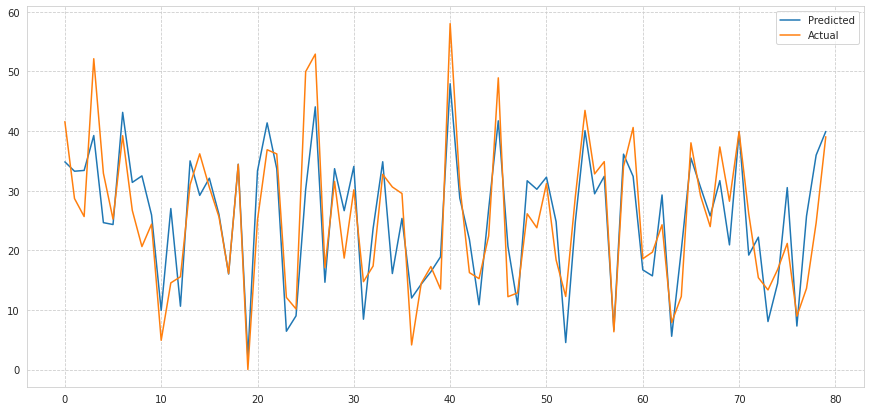

In [238]:
L2 = Ridge() #creating variable
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters 
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=5) #using gridsearchcv and cross validate the model
score_metrix(L2_cv,X_train_trans,X_test_trans,y_train,y_test) # fit and evaluate model with score_matrix function

## Polynomial 

In [239]:
# importing polynominal features from sklearn
from sklearn.preprocessing import PolynomialFeatures

In [240]:
poly = PolynomialFeatures(2) #creating variable with degree 2
poly_X_train = poly.fit_transform(X_train_trans) # fit the train set
poly_X_test = poly.transform(X_test_trans) #transform the test set

Training score  = 0.8539675327629384
MAE : 3.6879929831950964
MSE : 25.102664101308367
RMSE : 5.010255891799177
R2 : 0.8341367434267517
Adjusted R2 :  0.7930018992937056 

********************************************************************************
coefficient 
 [-5.80653624e+08  3.92631334e+00 -2.10327887e+00  2.40090055e-01
  2.35428361e-01  4.26247678e-02 -9.29519998e-01 -1.77185364e+12
  1.59812129e+12 -3.25285300e+10  1.09856181e+11  5.78240076e+11
 -1.62038556e+12 -1.46373956e+12  1.58210880e+12 -1.43299484e+12
 -1.06236153e+12  2.41934058e+11 -2.53394339e+11 -1.65496198e+12
  6.00650380e+11  6.65411992e+11  9.97736272e+10  2.07834032e+11
 -6.32385374e+11  6.81383035e+11  2.65946263e+11  1.23877172e+11
  3.29862340e+11 -2.97763115e+00  8.58498236e-02 -2.73921185e-01
  3.67542099e-01  5.49011230e-01  2.72521973e-02 -1.10955811e+00
 -2.66896057e+00 -1.62467194e+00 -1.28747559e+00 -5.81298828e-01
 -2.00689697e+00 -4.43344116e+00 -1.38898468e+00  2.45605087e+00
 -1.07003403e+00 -

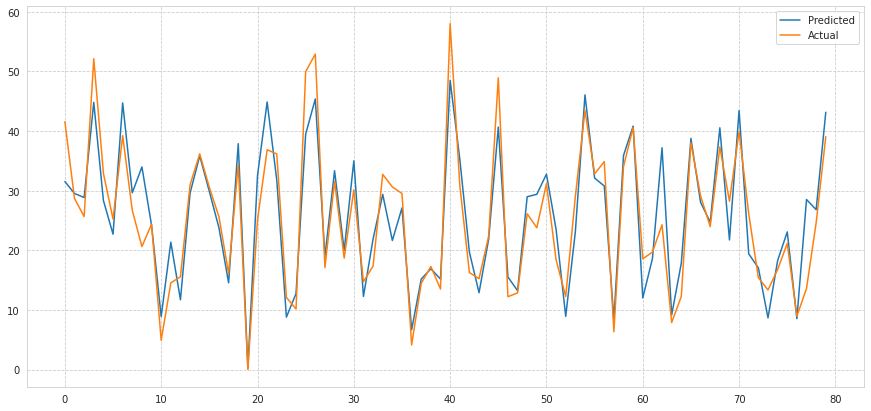

In [241]:
# fit and evaluate model with score_matrix function
score_metrix(LinearRegression(), poly_X_train,poly_X_test,y_train,y_test)

##<b> Train Test split for Tree Base Models
<b> because multicollinearty not effect tree base models

In [242]:
# Split data in X and Y
new_X = new_df.drop(columns='Rented Bike Count')
new_y = new_df['Rented Bike Count']

In [243]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(new_X,new_y, test_size=0.25,random_state=42)

In [244]:
# Scalling data with yeo-johnson
scaler = PowerTransformer()

In [245]:
X_train  = scaler.fit_transform(X_train) #fitting the X_train
X_test  = scaler.transform(X_test) # transform test set

# <b> Decission Tree 
### Using Grid Search CV for hyperparameter tuning and try to find best parameters

In [246]:
# imporing DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [247]:
# Parameters for Decission Tree model
param_grid = {'criterion' : ["mse"],
              'splitter' : ["best", "random"],
              'max_depth' : [10,15,20,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}

In [248]:
# Using Grid Search 
Dt_grid_search = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,cv=2,n_jobs=-1)

Training score  = 0.8168164900375258
The best parameters found out to be :{'criterion': 'mse', 'max_depth': 10, 'max_features': 24, 'min_samples_split': 100, 'splitter': 'best'} 
where model best score is:  0.7599596027203364 

MAE : 199.88691625303977
MSE : 95093.43271526876
RMSE : 308.3722307784356
R2 : 0.7676119153647745
Adjusted R2 :  0.7644918901543941 



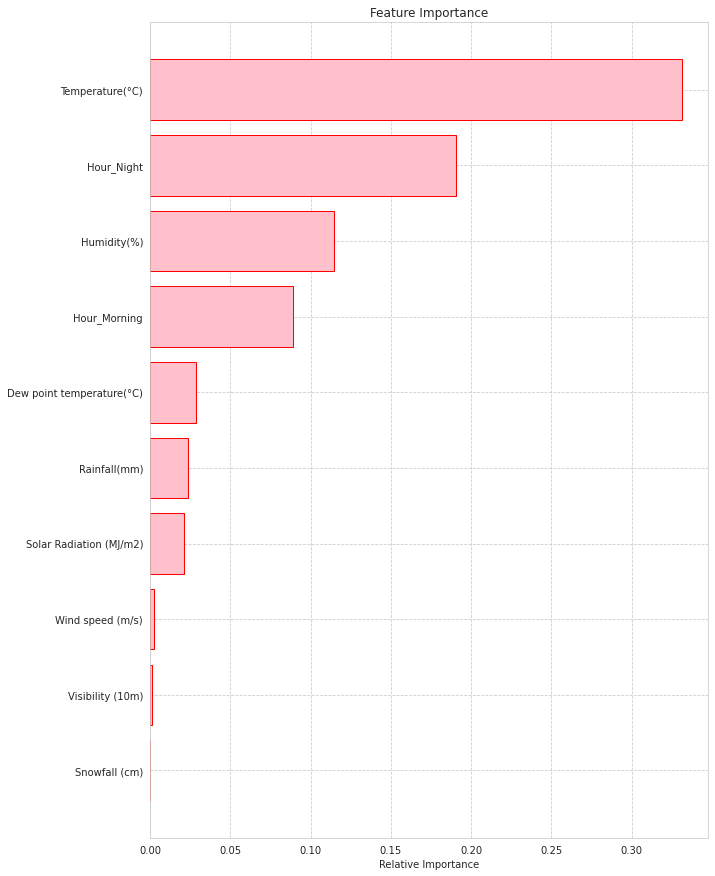

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


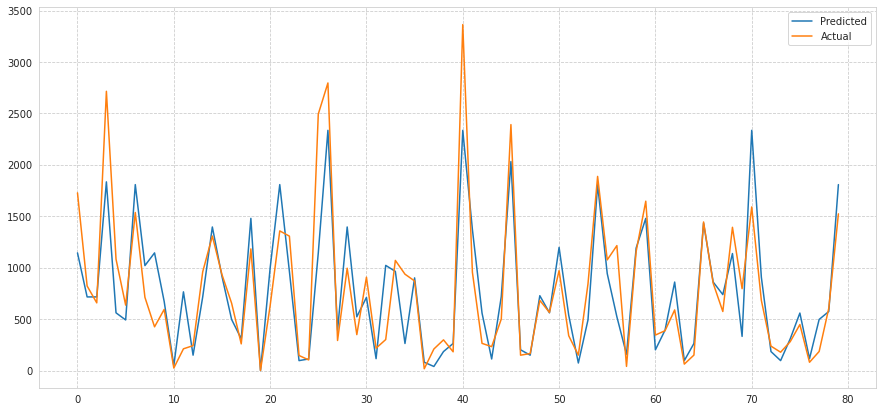

In [249]:
# fit and evaluate model with score_matrix function
score_metrix(Dt_grid_search,X_train,X_test,y_train,y_test)

#<b> RandomForest Regression

In [251]:
# Importing Randomfroest from sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

In [252]:
# parameters for Random forest
param_grid = {"n_estimators":[50,100,150],
              'max_depth' : [10,15,20,25,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}

In [253]:
# Using Grid SearchCV 
Ranom_forest_Grid_search = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1,verbose=2)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 575 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.9min finished


Training score  = 0.9469224680551279
The best parameters found out to be :{'max_depth': 25, 'max_features': 24, 'min_samples_split': 10, 'n_estimators': 150} 
where model best score is:  0.8379535774031781 

MAE : 167.23324490780084
MSE : 67773.66747061988
RMSE : 260.3337616803089
R2 : 0.8343755996340937
Adjusted R2 :  0.8321519387032551 



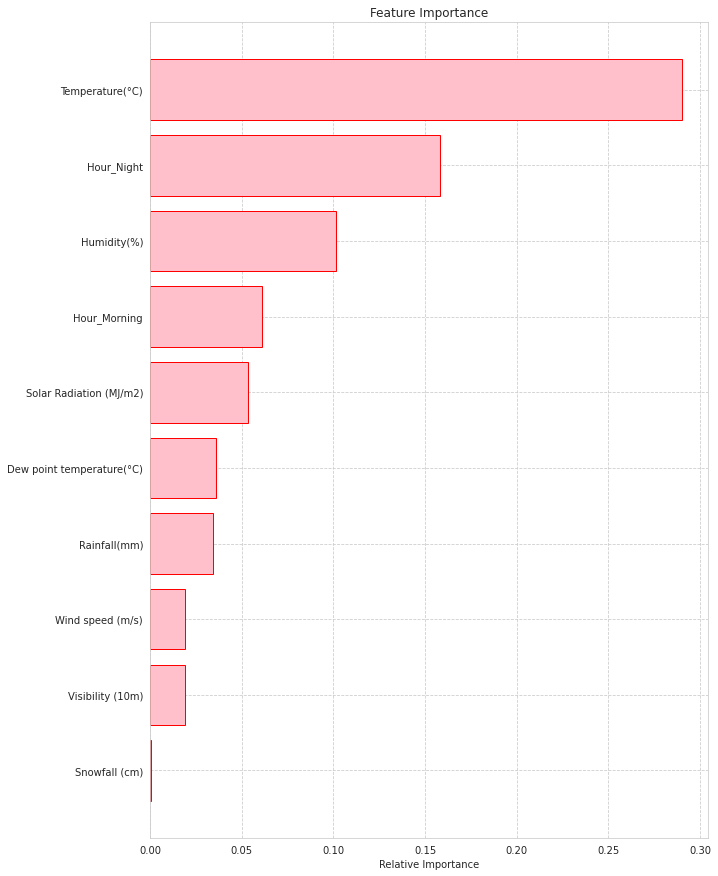

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


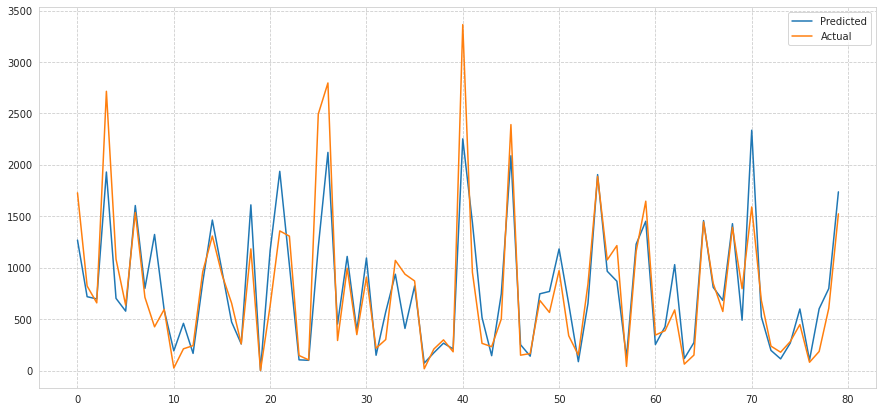

In [254]:
# fit and evaluate model with score_matrix function
score_metrix(Ranom_forest_Grid_search,X_train,X_test,y_train,y_test)

#<b> Bagging

In [255]:
# Importing Bagging from sklearn.ensemble
from sklearn.ensemble import BaggingRegressor

In [256]:
# parameters for Bagging
param_grid = {"n_estimators":[50,100,150],
              "bootstrap":["False","True"],
              'max_depth' : [10,15,20,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40]}

In [257]:
# Using Grid SearchCV 
Bagging_Grid_search = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1,verbose=2)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 482 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.6min finished


Training score  = 0.9459322853486569
The best parameters found out to be :{'bootstrap': 'True', 'max_depth': 20, 'max_features': 24, 'min_samples_split': 10, 'n_estimators': 150} 
where model best score is:  0.8376784472852347 

MAE : 167.6809566348519
MSE : 68644.14583541598
RMSE : 262.00027831171474
R2 : 0.8322483360141435
Adjusted R2 :  0.8299961145995186 



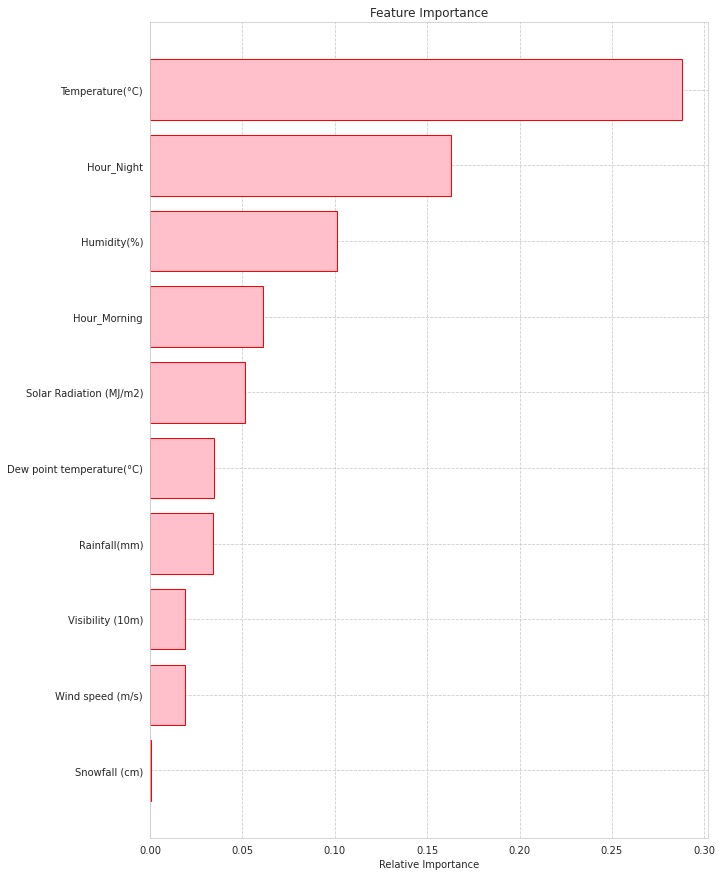

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


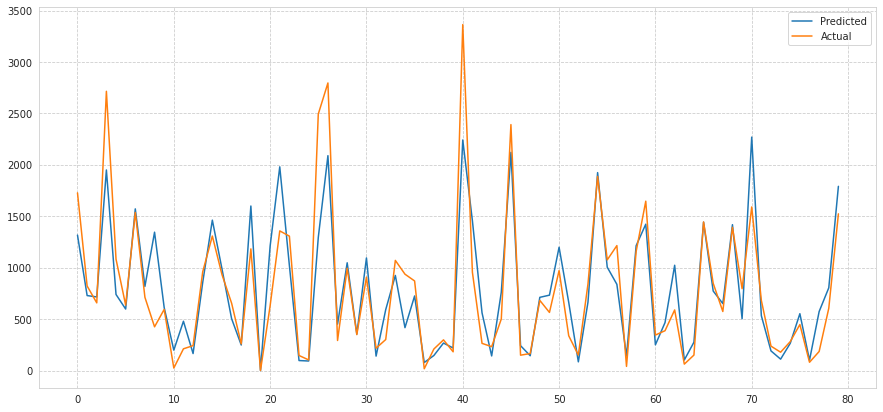

In [258]:
# fit and evaluate model with score_matrix function
score_metrix(Bagging_Grid_search,X_train,X_test,y_train,y_test)

#<b> Gradient Boosting Regressor

In [260]:
# Importing Gradient Boosting Regressor from sklearn.ensemble
from sklearn.ensemble import GradientBoostingRegressor 

In [261]:
# parameters for Gradient Boosting Regressor
param_grid = {'learning_rate':[0.15,0.1,0.05,0.02,0.20],
              'n_estimators':[100,150,200,250],
              'max_depth':[2,4,6,10]}

In [262]:
# Using grid search 
gradient_boost_grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, n_jobs=-1, verbose=2)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 13.6min finished


Training score  = 0.9942381457200098
The best parameters found out to be :{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 250} 
where model best score is:  0.843188351914149 

MAE : 162.7388214164159
MSE : 65634.36905400475
RMSE : 256.1920550173341
R2 : 0.8396035890683266
Adjusted R2 :  0.8374501187363735 



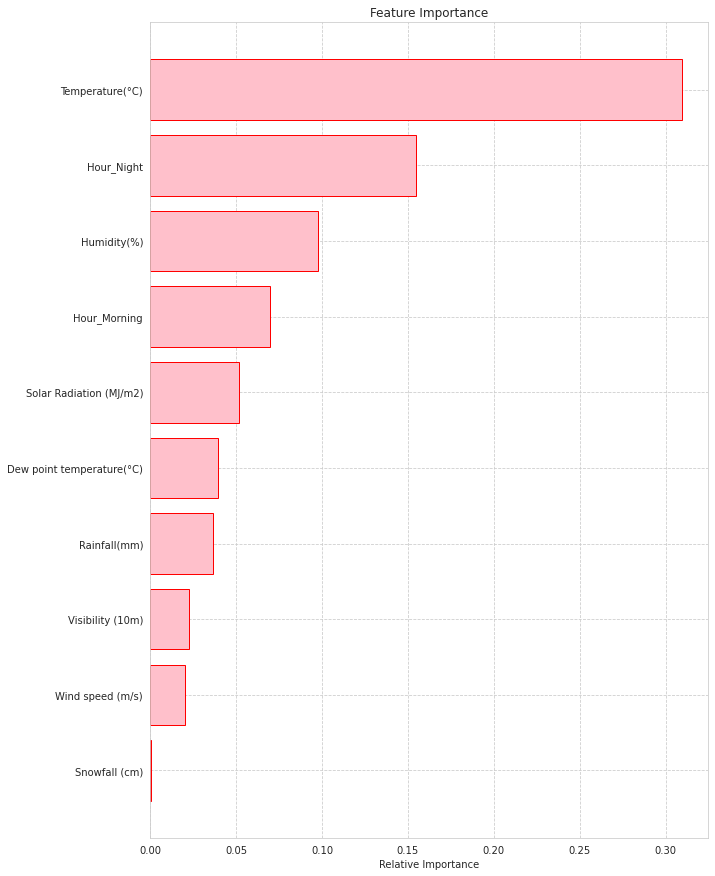

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


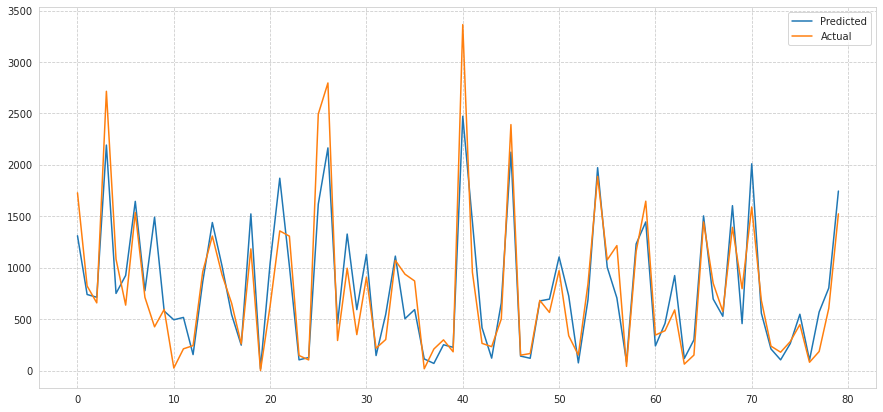

In [263]:
# fit and evaluate model with score_matrix function
score_metrix(gradient_boost_grid_search,X_train,X_test,y_train,y_test)

#<b> Adaboost Boost Regressor

In [264]:
# Importing Ada Boost Regressor from sklearn.ensemble
from sklearn.ensemble import AdaBoostRegressor

In [265]:
# parameters for Ada Boost Regressor
param_grid = {'n_estimators': [50,100,150,200],
          'learning_rate':[0.5,1,1.5,2],
          'base_estimator': [LinearRegression(),DecisionTreeRegressor()]}

In [266]:
#creating Ada boost grid model
Ada_boost_grid_search = GridSearchCV(AdaBoostRegressor(),param_grid=param_grid,n_jobs=-1)

Training score  = 0.9978755767604776
The best parameters found out to be :{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best'), 'learning_rate': 1.5, 'n_estimators': 200} 
where model best score is:  0.8411630327144184 

MAE : 163.0808219178082
MSE : 71361.22785388128
RMSE : 267.13522391081506
R2 : 0.8256083665857754
Adjusted R2 :  0.8232669974334548 



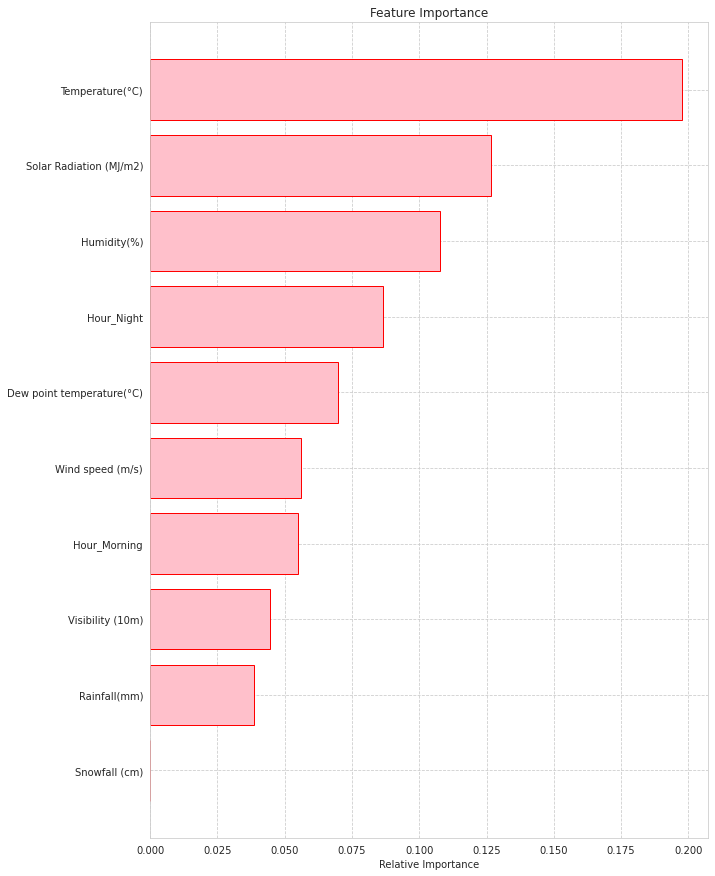

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


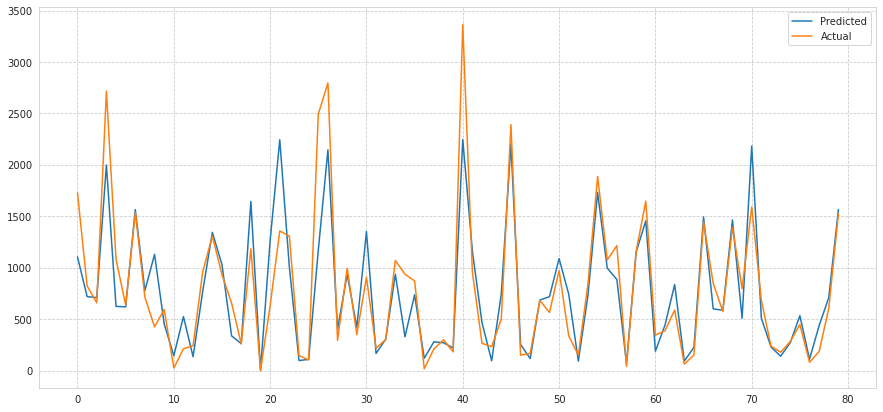

In [267]:
# fit and evaluate model with score_matrix function
score_metrix(Ada_boost_grid_search,X_train,X_test,y_train,y_test)

#<b> XGBoost Regression

In [268]:
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [269]:
params = {'learning_rate':[0.5,1,1.5,2],'n_estimators':[80,100,150],'max_depth':[15,20,30]}

In [270]:
#creating xgb grid model
xgb_grid_search= GridSearchCV(XGBRegressor(),param_grid=params,)

[11:19:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

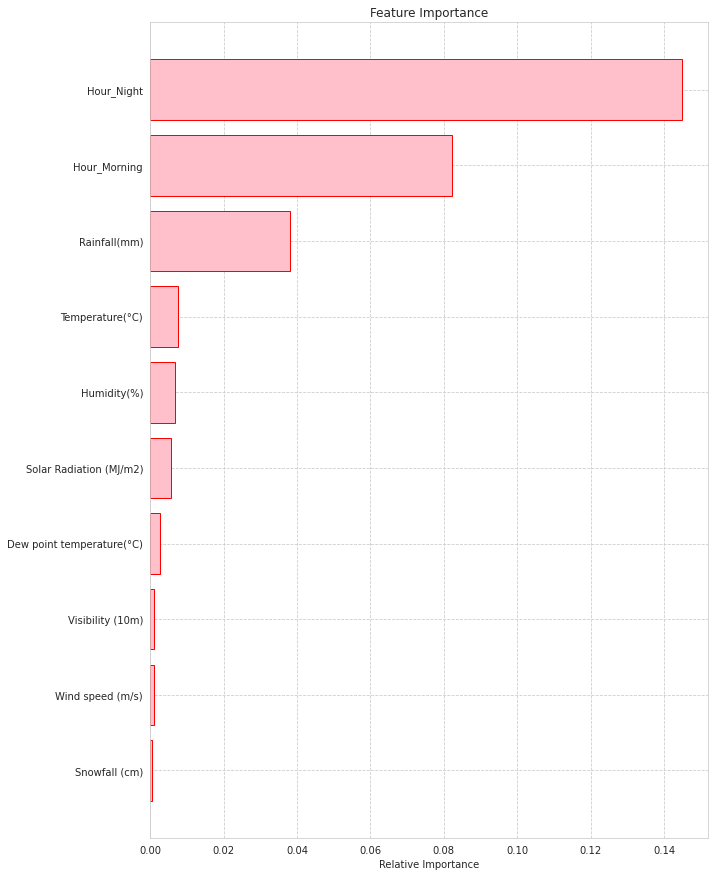

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


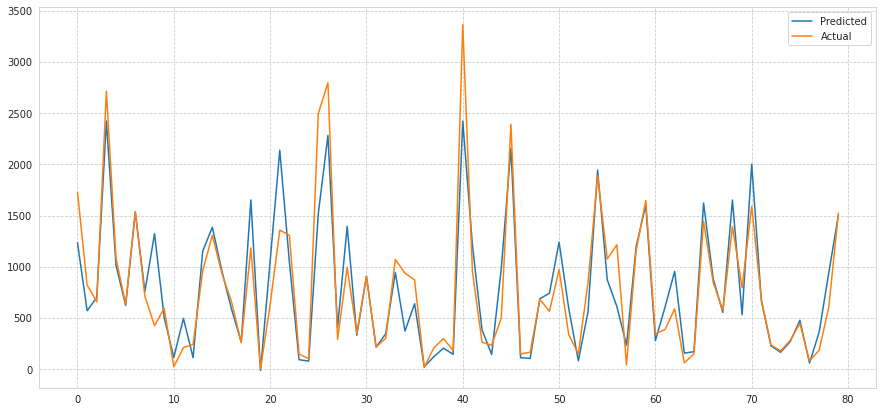

In [271]:
score_metrix(xgb_grid_search,X_train,X_test,y_train,y_test)

#<b> Creating Data Frame of all Evaluation Matrix with respect of models

In [272]:
#creating dictionary to store all the metrices 
all_matrices={'Mean_Absolute_error':mean_absolut_error,'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'Training_score':training_score,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [273]:
#list of all model name 
model_name=['Linear','Lasso','Ridge','Polynomial','Decision_Tree','Random_Forest','Bagging','Gradient_Boosting','Ada_Boost','XG_Boost']

In [274]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_matrices,orient='index',columns=model_name)

In [275]:
matrices_df

Linear      Lasso  ...     Ada_Boost      XG_Boost
Mean_Absolute_error      4.990976   4.991069  ...    163.080822    174.709741
Mean_square_error       40.958428  40.938366  ...  71361.227854  78375.864814
Root_Mean_square_error   6.399877   6.398310  ...    267.135224    279.956898
Training_score           0.737845   0.737812  ...      0.997876      1.000000
R2                       0.729371   0.729504  ...      0.825608      0.808466
Adjusted_R2              0.725865   0.725999  ...      0.823267      0.805895

[6 rows x 10 columns]

In [276]:
matrices_df=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [277]:
matrices_df

Models  Mean_Absolute_error  ...        R2  Adjusted_R2
0             Linear             4.990976  ...  0.729371     0.725865
1              Lasso             4.991069  ...  0.729504     0.725999
2              Ridge             4.990003  ...  0.729498     0.725993
3         Polynomial             3.687993  ...  0.834137     0.793002
4      Decision_Tree           199.886916  ...  0.767612     0.764492
5      Random_Forest           167.233245  ...  0.834376     0.832152
6            Bagging           167.680957  ...  0.832248     0.829996
7  Gradient_Boosting           162.738821  ...  0.839604     0.837450
8          Ada_Boost           163.080822  ...  0.825608     0.823267
9           XG_Boost           174.709741  ...  0.808466     0.805895

[10 rows x 7 columns]

##<b> We will review feature-visualization using Local Interpretable Model Explanations (LIME) and Shapley Additive Explanation (SHAP).

In [278]:
# first install the packages
!pip install shap
!pip install lime

     |████████████████████████████████| 371 kB 27.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509258 sha256=ac0ba78781fed3bda3370c2e77d017f4e2e61906ca7c5c7bbc5e1946f01b1619
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap
     |████████████████████████████████| 275 kB 31.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=1ed41c1f07715345a8f093562844d289de77b119a8ddfd6754a9cc92ce70b2f8
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [279]:
import lime
from lime import lime_tabular

In [280]:
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data = X_train,
    feature_names = X_train.columns.values,
    mode = 'Regression',
    verbose=True,
    random_state =42 )

lime_exp = lime_explainer.explain_instance(
    data_row = X_test.iloc[4],
    predict_fn = xgb_grid_search.best_estimator_.predict, 
)

AttributeError: ignored

In [ ]:
 plt = lime_exp.as_pyplot_figure()
 plt.tight_layout()